A1 de Linguagens de Programação – 19/09/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [114]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Lucas Machado Moschen
Olá, Lucas Machado Moschen!
Bom trabalho!


In [115]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import time
from IPython.display import clear_output
%matplotlib inline

Questão 1 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:  
a) Crie uma função genérica para construir um dicionário de frequências de palavras de um texto (string), passado como parâmetro. Aplique a função ao texto;  
b) Identifique os candidatos a nomes próprios no texto;  
c) Imagine que o texto seja constituído pela soma de suas letras, com repetições. Com esta "caixa de letras", quantas vezes você conseguiria escrever seu nome completo? Use as letras da variável meu_nome, sem os espaços em branco.  
d) Identifique as palavras que só ocorrem uma vez;  
e) Crie código para salvar os resultados em um arquivo chamado "respostas_q1.txt" no computador.  

In [116]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [126]:
texto

'\ufeffThe Project Gutenberg EBook of Dom Casmurro, by Machado de Assis\n\nThis eBook is for the use of anyone anywhere in the United States and most\nother parts of the world at no cost and with almost no restrictions\nwhatsoever.  You may copy it, give it away or re-use it under the terms of\nthe Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.  If you are not located in the United States, you\'ll have\nto check the laws of the country where you are located before using this ebook.\n\nTitle: Dom Casmurro\n\nAuthor: Machado de Assis\n\nRelease Date: October 15, 2017 [EBook #55752]\n\nLanguage: Portuguese\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK DOM CASMURRO ***\n\n\n\n\nProduced by Laura Natal Rodriguez & Marc D\'Hooghe at Free\nLiterature (online soon in an extended version,also linking\nto free sources for education worldwide ... MOOC\'s,\neducational materials,...) (Images generously made available\nby the Bibliotheca Nacional Digital Brasil

In [181]:
#seu código aqui
#a)
def dicio_freq(text):
    text = text.replace('»','') #simbolos estranhos são retirados
    text = text.replace('--','')
    text = text.replace('\n','')
    text = text.replace('...',' ')
    text = text.replace('«','')
    for simbolo in string.punctuation:
        text = text.replace(simbolo,simbolo+' ') #observadas várias palavras com problemas de [palavra],[palavra]
    palavras = [p.lower() for p in text.split() if not p[0].isdigit()] #coleciona as palavras do texto que não são números
    palavras_repeticao = [p.strip(string.punctuation) for p in palavras] #tira qualquer excesso de pontuação
    palavras = set(palavras_repeticao) #transforma num conjunto
    freq_palavras = {p:0 for p in palavras} #conta as palavras e coloca em um dicionário
    for p in palavras_repeticao:
        freq_palavras[p] += 1
    return freq_palavras
freq_palavras = dicio_freq(texto)

In [182]:
#seu código aqui
#b)
def nomes_proprios(text):
    text = text.replace('»','') #simbolos estranhos são retirados
    text = text.replace('--','')
    text = text.replace('\n','')
    text = text.replace('...',' ')
    text = text.replace('«','')
    palavras = [p for p in text.split() if p.istitle()]
    for p in palavras:
        if palavras[palavras.index(p)-1].endswith('.'):
            palavras.remove(p)
        elif palavras[palavras.index(p)-1].endswith('?'):
            palavras.remove(p)
        elif palavras[palavras.index(p)-1].endswith('!'):
            palavras.remove(p)
    palavras = [p.strip(string.punctuation) for p in palavras]
    palavras = [p for p in palavras if not p[0].isdigit()]
    proprios = {p for p in palavras if not p.lower() in texto}
    return proprios
proprios = nomes_proprios(texto)

In [183]:
#seu código aqui
#c)
def quantas_vezes(text,meu_nome):
    quantidade = []
    letras_nec = []
    text = text.replace(' ','')
    text = text.replace(string.punctuation,'')
    text = text.replace('\n','')
    text = text.replace('\t','')
    text = text.lower()
    nome = meu_nome.lower()
    nome = nome.replace(' ','')
    nome = list(nome)
    letras_nome = [(n,nome.count(n)) for n in nome]
    for i in range(len(letras_nome)):
        letras_nec.append((letras_nome[i][0],text.count(letras_nome[i][0])))
        quantidade.append((letras_nome[i][0],(letras_nec[-1][1]//letras_nome[i][1])))
    quantidade.sort(key=lambda x:x[1])
    return quantidade[0][1]
quantidade = quantas_vezes(texto,meu_nome)

In [184]:
#seu código aqui
#d)
contagem = dicio_freq(texto)
contagem = {k for k in contagem if contagem[k] == 1}

In [343]:
#seu código aqui
#e)
f = open('respostas_q1.txt', 'w', encoding='utf-8')
f.write('Questão a')
f.write('\n')
f.write(str(freq_palavras))
f.write('\n')
f.write('Questão b')
f.write('\n')
f.write(str(proprios))
f.write('\n')
f.write('Questão c')
f.write('\n')
f.write(str(quantidade))
f.write('\n')
f.write('Questão d')
f.write('\n')
f.write(str(contagem))
f.write('\n')

1

Questão 2 (2.0 pontos)  

Seja d(n) definido como a suma dos divisores inteiros de n. Se d(a) = b e d(b) = a, sendo a ≠ b, então a e b são um "par amigável" de números.  

Por exemplo, os divisores inteiros de 220 são 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 e 110; então d(220) = 284.  
Os divisores inteiros de 284 são 1, 2, 4, 71 e 142; então d(284) = 220.  

Encontre todos os "pares amigáveis" de números menores que 20000.  Crie uma lista de tuplas com esses pares.  

In [49]:
def divisores(n):
    div = [1] 
    for k in range(2,n//2+1):
        if n%k == 0:
            div.append(k)
    return div #divisors com excessão ao número

amigaveis = []
listab = []
for i in range(20000):
    if not i in listab:
        a = i
        b = sum(divisores(a))
        if b < 20000:
            if a == sum(divisores(b)) and a!= b:
                amigaveis.append((a,b))
                listab.append(b)
        else:
            continue
    else:
        continue
print(amigaveis)

[(220, 284), (1184, 1210), (2620, 2924), (5020, 5564), (6232, 6368), (10744, 10856), (12285, 14595), (17296, 18416)]


Questão 3 (2.5 pontos)  

Usando funções geradoras, crie um objeto que emule um dado de oito faces (1-8) que seja viciado, de tal forma que a probabilidade desta função geradora retornar certo valor seja proporcional ao próprio valor (por exemplo, a face 6 é 3 vezes mais provável de sair do que a face 2).  

(a) Usando os comandos plt.plot ou plt.hist, mostre graficamente o resultado de 10000 lançamentos;  
(b) Modifique esta função geradora de forma que ela termine automaticamente quando todos os valores possíveis (1,2,3,4,5,6,7,8) tiverem sido retornados pelo menos uma vez. Neste caso, ela retornará o tempo absoluto total que ocorreu desde a primeira iteração.  

In [76]:
def dado_viciado(lados=8):
    probabilidade = []
    for i in range(lados,0,-1):
        probabilidade.extend(list(range(lados,i-1,-1)))
    probabilidade.sort()
    while True:
        yield random.choice(probabilidade)
#foram usados as funções range e yield que são geradoras

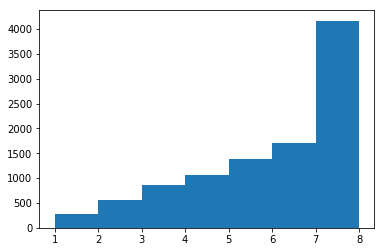

In [103]:
#a
x = []
dado = dado_viciado()
for i in range(10000):
    x.append(next(dado))
bins = [1,2,3,4,5,6,7,8]
plt.hist(x,bins)
plt.show()


In [260]:
#b
def dado_viciado2(lados=8):
    t0 = time.time()
    probabilidade = []
    for i in range(lados,0,-1):
        probabilidade.extend(list(range(lados,i-1,-1)))
    probabilidade.sort()
    sorteados = set({})
    while len(sorteados)<8:
        a = random.choice(probabilidade)
        sorteados.add(a)        
    return time.time() - t0
dado_viciado2()
#foram usados as funções range e yield que são geradoras
# o tempo ainda é curto.

0.00011038780212402344

Questão 4 (3.0 pontos)   

Crie uma classe chamada "Elevador" que recebe, ao instanciada, o número de andares do edifício e inicia no andar mais baixo.  
Crie métodos e propriedades para permitir que o elevador:  
- Receba uma chamada (usuário aperta um botão em um andar);  
- Receba um andar como destino (usuários apertam botões dentro do elevador);  
- Informe em qual andar o elevador está;  
- Informe a sequência de andares ainda por visitar;
- Informe a quantidade de vezes que parou em cada andar (passar pelo andar sem "parar" no andar não conta);  

Leve em consideração que cada deslocamento de andar demora 3 segundos.  
Simule o comportamento do elevador atendendo à dez usuários, que têm andar de origem, andar de destino e sequência de chegada (fora e dentro do elevador) definidos aleatóriamente.  

In [296]:
class Elevador: #faz ignorando para todos os efeitos a posicao
    def __init__(self,andares):
        self.andares = andares
        self.posicao = 0
        self.sequencia = []
        self.quantidade = []
        for an in range(self.andares):
            self.quantidade.append([an+1,0])
    
    def chamada(self,*andar):
        self.sequencia.extend(andar)
        #self.sequencia.sort()
        self.posicao = next(self.lugar())
                 
    def destino(self,*destinies):
        self.sequencia.extend(destinies)
        self.posicao = next(self.lugar())
         
    def sequencia(self):
        return self.sequencia
    
    def lugar(self):
        while True:
            self.posicao = self.sequencia[0]
            self.quantidade[self.sequencia[0]-1][1]+=1
            self.sequencia.pop(0)
            yield self.posicao

In [338]:
#Simulação

predio1 = Elevador(10)
escolhas = list(range(1,11))
chamadas = []
while len(chamadas)<10:
    a = random.choice(escolhas)
    b = random.choice(escolhas)
    if a != b:
        chamadas.append((a,b))
caminho = []
print(chamadas)
for i in range(len(chamadas)):
    predio1.chamada(chamadas[i][0])
    caminho.append(predio1.posicao)
    print(predio1.posicao)    
for k in range(len(chamadas)):
    predio1.destino(chamadas[k][1])
    caminho.append(predio1.posicao)
    print(predio1.posicao)
caminho

[(10, 8), (9, 3), (3, 1), (9, 4), (5, 2), (5, 3), (6, 1), (7, 3), (1, 5), (1, 8)]
10
9
3
9
5
5
6
7
1
1
8
3
1
4
2
3
1
3
5
8


[10, 9, 3, 9, 5, 5, 6, 7, 1, 1, 8, 3, 1, 4, 2, 3, 1, 3, 5, 8]

Questão bônus I (0.5 ponto)   

Ilustre graficamente as posições do elevador acima para a simulação pedida:  

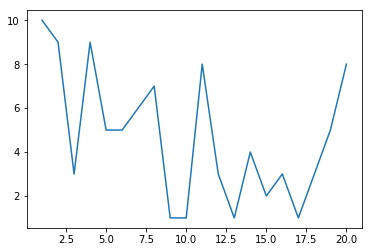

In [342]:
x = list(range(1,len(caminho)+1))
plt.plot(x,caminho)
plt.show()

Questão bônus II (0.5 ponto)   

Crie um simulador de prédio inteligente, controlando chamadas feitas para n > 1 elevadores:  

In [ ]:
#seu código aqui